# **Studi Kasus: Optimasi Penggunaan Lahan untuk Pertanian dan Konservasi**

Deskripsi:

Di suatu wilayah, terdapat lahan yang dapat digunakan baik untuk pertanian maupun untuk konservasi lingkungan. Tujuannya adalah mengoptimalkan penggunaan lahan untuk memaksimalkan hasil pertanian (efisiensi penggunaan lahan untuk pertanian) sekaligus memaksimalkan konservasi lingkungan (meminimalkan dampak negatif terhadap ekosistem).

Tujuan:
1. Efisiensi Penggunaan Lahan untuk Pertanian (Objective 1):
Memaksimalkan hasil pertanian dari penggunaan lahan.
2. Konservasi Lingkungan (Objective 2):
Meminimalkan dampak negatif terhadap ekosistem, seperti mengurangi degradasi tanah dan kehilangan keanekaragaman hayati.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Optimasi menggunakan Algoritma MOIPSO

## Inisialiasi Parameter

In [ ]:
c1 = c2 = 2.0
vmax = 1.0
vmin = -1.0
wmax = 0.9
wmin = 0.4
Tmax = 100
N = 50
Amax = 100
pr = 0.1

## Definisi fungsi fitness untuk pengoptimalan penggunaan lahan

In [ ]:
def fitness_function(x):
    hasil_pertanian = (x[0] - 3)**2  # Tujuan 1: Memaksimalkan hasil pertanian
    konservasi_lingkungan = (x[0] + 2)**2  # Tujuan 2: Meminimalkan dampak terhadap ekosistem
    return np.array([hasil_pertanian, konservasi_lingkungan])

## Inisialisasi populasi

In [ ]:
def initialize_population(N, dimensions, lower_bound, upper_bound):
    population = np.random.uniform(low=lower_bound, high=upper_bound, size=(N, dimensions))
    velocity = np.random.uniform(low=vmin, high=vmax, size=(N, dimensions))
    return population, velocity

## Evaluasi fitness

In [ ]:
def evaluate_population(population):
    fitness_values = np.array([fitness_function(individual) for individual in population])
    return fitness_values

## Pembaruan kecepatan dan posisi

In [ ]:
def update_velocity_position(population, velocity, pbest, gbest, w, c1, c2):
    r1, r2 = np.random.rand(), np.random.rand()
    new_velocity = w * velocity + c1 * r1 * (pbest - population) + c2 * r2 * (gbest - population)
    new_velocity = np.clip(new_velocity, vmin, vmax)
    new_position = population + new_velocity
    return new_velocity, new_position

## Mutasi Gaussian

In [ ]:
def gaussian_mutation(individual, pr):
    if random.random() < pr:
        mutation = np.random.normal(0, 1, len(individual))
        individual = individual + mutation
    return individual

## Pembaruan arsip eksternal

In [ ]:
def update_external_archive(archive, archive_fitness, population, fitness_values, Amax):
    combined = np.vstack((archive, population))
    combined_fitness = np.vstack((archive_fitness, fitness_values))
    # Seleksi nondominasi (implementasi sederhana)
    pareto_front = []
    pareto_fitness = []
    for i in range(len(combined)):
        dominated = False
        for j in range(len(combined)):
            if np.all(combined_fitness[j] <= combined_fitness[i]) and np.any(combined_fitness[j] < combined_fitness[i]):
                dominated = True
                break
        if not dominated:
            pareto_front.append(combined[i])
            pareto_fitness.append(combined_fitness[i])
    archive = np.array(pareto_front)
    archive_fitness = np.array(pareto_fitness)
    if len(archive) > Amax:
        indices = np.random.choice(len(archive), size=Amax, replace=False)
        archive = archive[indices]
        archive_fitness = archive_fitness[indices]
    return archive, archive_fitness

## Algoritma MOIPSO

In [ ]:
def moipso():
    dimensions = 1
    lower_bound = -10
    upper_bound = 10

    population, velocity = initialize_population(N, dimensions, lower_bound, upper_bound)
    pbest = population.copy()
    pbest_fitness = evaluate_population(population)
    gbest = population[np.argmin(np.sum(pbest_fitness, axis=1))]

    archive = np.empty((0, dimensions))
    archive_fitness = np.empty((0, 2))

    for T in range(Tmax):
        w = wmax - ((wmax - wmin) * T / Tmax)

        for i in range(N):
            velocity[i], population[i] = update_velocity_position(population[i], velocity[i], pbest[i], gbest, w, c1, c2)
            population[i] = gaussian_mutation(population[i], pr)

        fitness_values = evaluate_population(population)

        for i in range(N):
            if np.any(fitness_values[i] < pbest_fitness[i]):
                pbest[i] = population[i]
                pbest_fitness[i] = fitness_values[i]

        gbest = population[np.argmin(np.sum(pbest_fitness, axis=1))]

        archive, archive_fitness = update_external_archive(archive, archive_fitness, population, fitness_values, Amax)

        print(f"Generasi {T}, Arsip Size: {len(archive)}")

    return archive

## Menjalankan MOIPSO dan mendapatkan solusi Pareto

In [ ]:
pareto_solutions = moipso()

Generasi 0, Arsip Size: 20
Generasi 1, Arsip Size: 45
Generasi 2, Arsip Size: 77
Generasi 3, Arsip Size: 100
Generasi 4, Arsip Size: 100
Generasi 5, Arsip Size: 100
Generasi 6, Arsip Size: 100
Generasi 7, Arsip Size: 100
Generasi 8, Arsip Size: 100
Generasi 9, Arsip Size: 100
Generasi 10, Arsip Size: 100
Generasi 11, Arsip Size: 100
Generasi 12, Arsip Size: 100
Generasi 13, Arsip Size: 100
Generasi 14, Arsip Size: 100
Generasi 15, Arsip Size: 100
Generasi 16, Arsip Size: 100
Generasi 17, Arsip Size: 100
Generasi 18, Arsip Size: 100
Generasi 19, Arsip Size: 100
Generasi 20, Arsip Size: 100
Generasi 21, Arsip Size: 100
Generasi 22, Arsip Size: 100
Generasi 23, Arsip Size: 100
Generasi 24, Arsip Size: 100
Generasi 25, Arsip Size: 100
Generasi 26, Arsip Size: 100
Generasi 27, Arsip Size: 100
Generasi 28, Arsip Size: 100
Generasi 29, Arsip Size: 100
Generasi 30, Arsip Size: 100
Generasi 31, Arsip Size: 100
Generasi 32, Arsip Size: 100
Generasi 33, Arsip Size: 100
Generasi 34, Arsip Size: 10

In [ ]:
# Evaluasi fitness dari solusi Pareto
pareto_fitness_values = np.array([fitness_function(solution) for solution in pareto_solutions])

## Membuat scatter plot

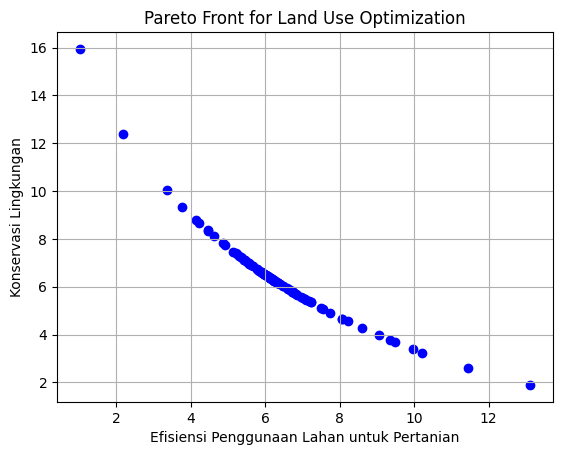

In [ ]:
plt.scatter(pareto_fitness_values[:, 0], pareto_fitness_values[:, 1], c='blue', marker='o')
plt.title('Pareto Front for Land Use Optimization')
plt.xlabel('Efisiensi Penggunaan Lahan untuk Pertanian')
plt.ylabel('Konservasi Lingkungan')
plt.grid(True)
plt.show()